In [1]:
from google.colab import files
uploaded = files.upload()

Saving Zoo.csv to Zoo.csv


In [39]:
import numpy as np
import pandas as pd
Zoo = pd.read_csv("Zoo.csv")
Zoo

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [30]:
Zoo.shape

(101, 18)

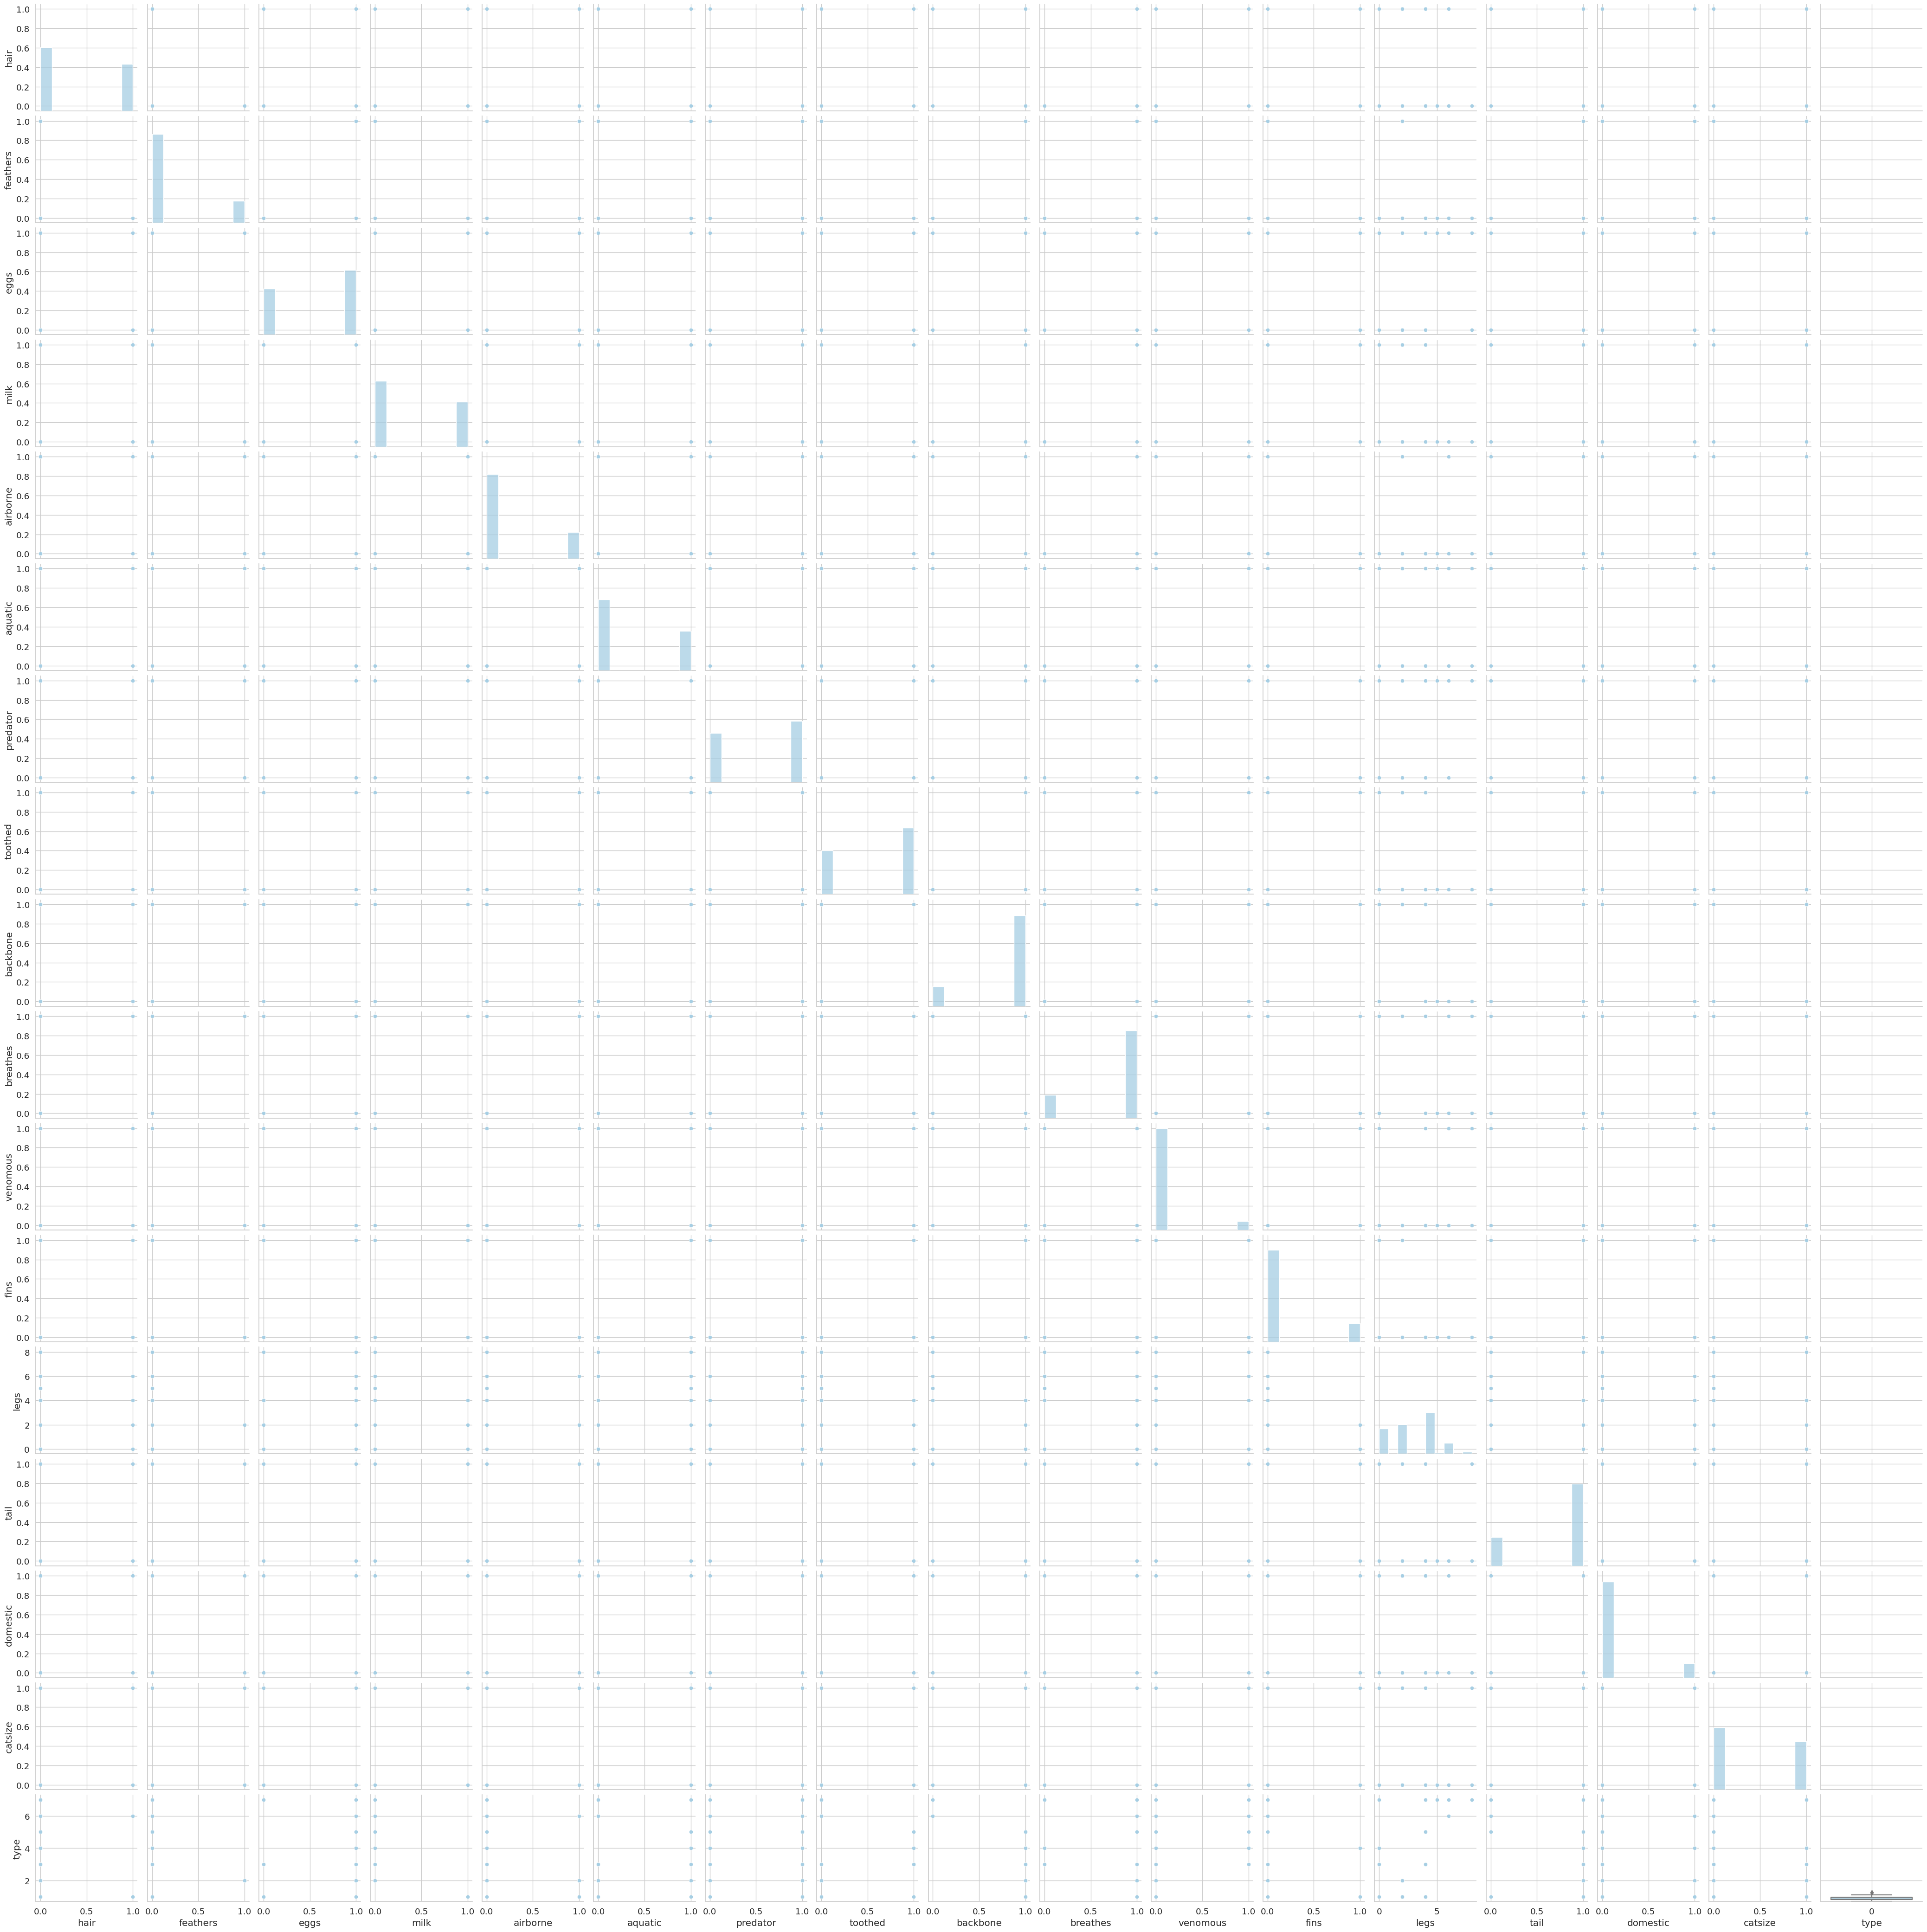

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(Zoo)
sns.boxplot(Zoo['legs'])
plt.show()

In [33]:
import plotly.express as px
fig = px.bar(Zoo, x=Zoo["eggs"],
             y = Zoo["aquatic"],
             color = Zoo["milk"])
fig.show()

In [37]:
import plotly.express as px
fig = px.bar(Zoo, x=Zoo["venomous"],
             y = Zoo["aquatic"],
             color = Zoo["milk"])
fig.show()

In [38]:
import plotly.express as px
fig = px.bar(Zoo, x=Zoo["hair"],
             y = Zoo["backbone"],
             color = Zoo["milk"])
fig.show()

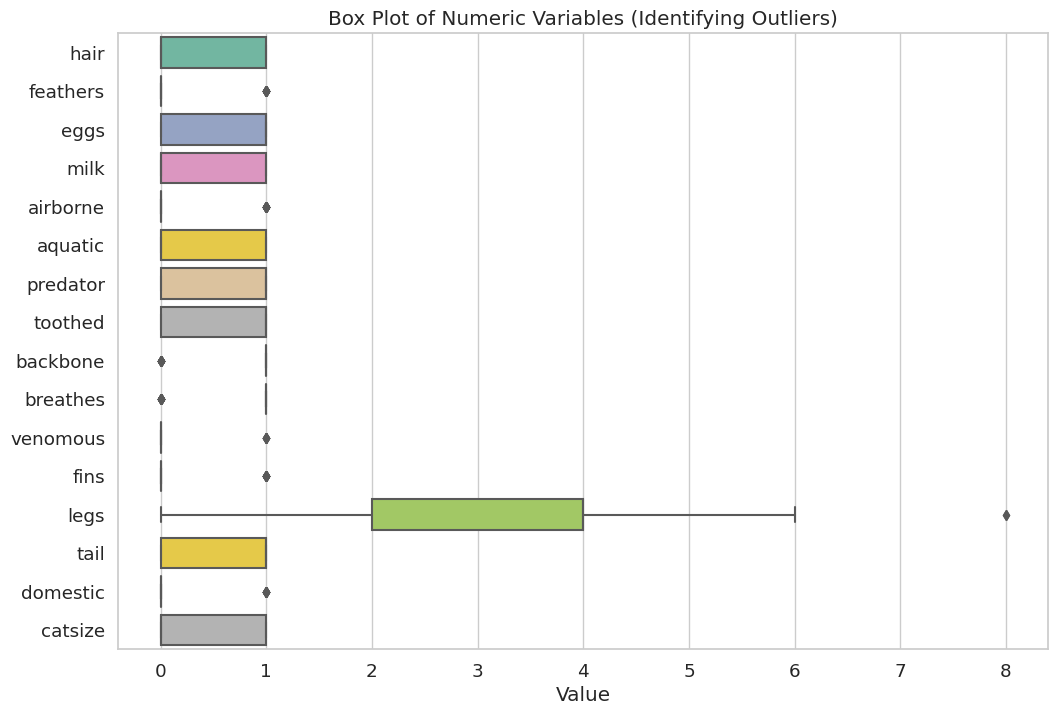

In [6]:
data_numeric = Zoo.drop(columns=['type'])
plt.figure(figsize=(12, 8))
sns.boxplot(data=data_numeric, orient="h", palette="Set2")
plt.xlabel('Value')
plt.title('Box Plot of Numeric Variables (Identifying Outliers)')
plt.show()

<Axes: xlabel='hair', ylabel='legs'>

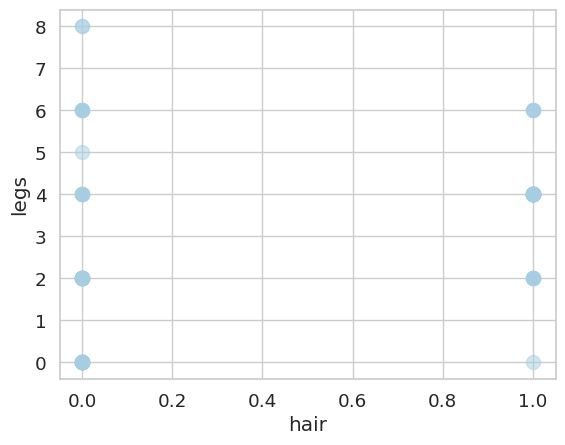

In [50]:
Zoo.plot.scatter(x='hair', y='legs', s=100, alpha=0.5)

In [7]:
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
Zoo.info()
Zoo.describe()
Zoo.isna().sum()
Zoo.corr()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


<ipython-input-7-b264c66d3500>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Zoo.corr()


,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
hair,1.000000,-0.427851,-0.817382,0.878503,-0.198431,-0.473554,-0.154769,0.492531,0.191681,0.441149,-0.104245,-0.280313,0.394009,0.048973,0.207208,0.455020,-0.562384
feathers,-0.427851,1.000000,0.419248,-0.410761,0.656553,-0.058552,-0.104430,-0.613631,0.231403,0.254588,-0.145739,-0.223541,-0.206686,0.292569,0.031586,-0.135934,-0.197520
eggs,-0.817382,0.419248,1.000000,-0.938848,0.376646,0.376244,0.011605,-0.642150,-0.340420,-0.382777,0.098689,0.164796,-0.224918,-0.221090,-0.155610,-0.514650,0.661825
milk,0.878503,-0.410761,-0.938848,1.000000,-0.366765,-0.362613,-0.029721,0.628168,0.384958,0.423527,-0.242449,-0.156328,0.214196,0.210026,0.163928,0.574906,-0.723683
airborne,-0.198431,0.656553,0.376646,-0.366765,1.000000,-0.172638,-0.295181,-0.594311,-0.104718,0.286039,0.008528,-0.251157,0.043712,0.009482,0.063274,-0.349768,0.022677
aquatic,-0.473554,-0.058552,0.376244,-0.362613,-0.172638,1.000000,0.375978,0.053150,0.022463,-0.637506,0.087915,0.604492,-0.360638,-0.034642,-0.224308,-0.111866,0.326639
predator,-0.154769,-0.104430,0.011605,-0.029721,-0.295181,0.375978,1.000000,0.129452,0.051022,-0.262931,0.115391,0.190302,-0.099723,0.018947,-0.309794,0.144790,0.061179
toothed,0.492531,-0.613631,-0.642150,0.628168,-0.594311,0.053150,0.129452,1.000000,0.575085,-0.065690,-0.062344,0.364292,-0.193476,0.310368,0.069430,0.344010,-0.471527
backbone,0.191681,0.231403,-0.340420,0.384958,-0.104718,0.022463,0.051022,0.575085,1.000000,0.207666,-0.246611,0.209499,-0.432856,0.731762,0.101733,0.356976,-0.828845
breathes,0.441149,0.254588,-0.382777,0.423527,0.286039,-0.637506,-0.262931,-0.065690,0.207666,1.000000,-0.120752,-0.617219,0.369868,0.088952,0.124068,0.204125,-0.519308


In [8]:
# KNN Model
X = Zoo.iloc[:,1:17]
Y = Zoo.iloc[:,-1]

In [9]:
from sklearn.neighbors import  KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X,Y)

KNeighborsClassifier(n_neighbors=17)

In [10]:
from sklearn.model_selection import GridSearchCV
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': [1, 5, 10, 15, 20]}
knn_cv_model = GridSearchCV(knn, param_grid, cv=10).fit(X, Y)
best_n_neighbors = knn_cv_model.best_params_['n_neighbors']
print("Best value of n_neighbors:", best_n_neighbors)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(


Best value of n_neighbors: 1


In [11]:
from sklearn.metrics import accuracy_score

knn_tuned = KNeighborsClassifier(n_neighbors=best_n_neighbors).fit(X, Y)
knn_y_pred = knn_tuned.predict(X)
knn_acc = accuracy_score(Y, knn_y_pred)
print('Accuracy score for KNN with tuned hyperparameters: {:.2f}'.format(knn_acc))

Accuracy score for KNN with tuned hyperparameters: 1.00


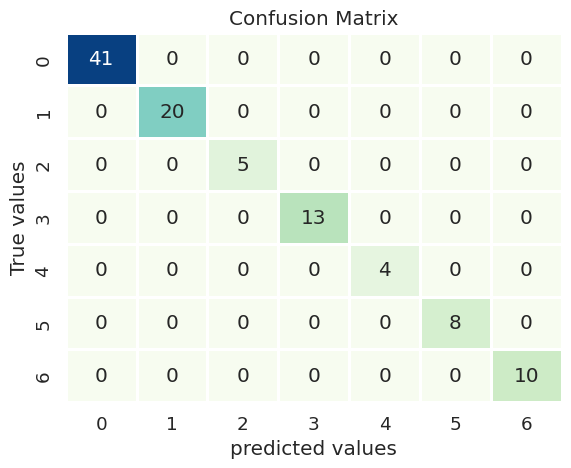

In [12]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(Y, knn_y_pred), annot = True, lw = 2, cbar = False, cmap = 'GnBu')
plt.ylabel('True values')
plt.xlabel('predicted values')
plt.title('Confusion Matrix')
plt.show()

In [13]:
from sklearn.metrics import classification_report
print(classification_report(Y, knn_y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        41
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00        13
           5       1.00      1.00      1.00         4
           6       1.00      1.00      1.00         8
           7       1.00      1.00      1.00        10

    accuracy                           1.00       101
   macro avg       1.00      1.00      1.00       101
weighted avg       1.00      1.00      1.00       101



<Axes: >

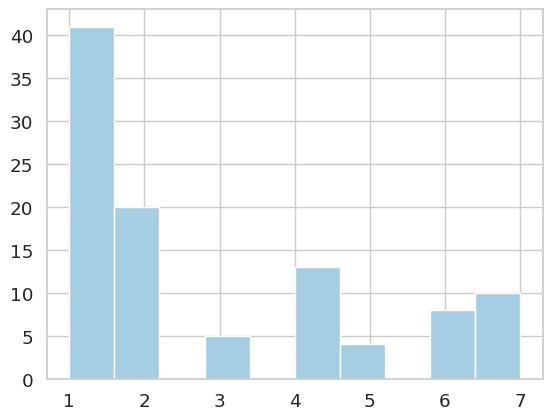

In [44]:
Y.hist()

array([[<Axes: title={'center': 'hair'}>,
        <Axes: title={'center': 'feathers'}>,
        <Axes: title={'center': 'eggs'}>,
        <Axes: title={'center': 'milk'}>],
       [<Axes: title={'center': 'airborne'}>,
        <Axes: title={'center': 'aquatic'}>,
        <Axes: title={'center': 'predator'}>,
        <Axes: title={'center': 'toothed'}>],
       [<Axes: title={'center': 'backbone'}>,
        <Axes: title={'center': 'breathes'}>,
        <Axes: title={'center': 'venomous'}>,
        <Axes: title={'center': 'fins'}>],
       [<Axes: title={'center': 'legs'}>,
        <Axes: title={'center': 'tail'}>,
        <Axes: title={'center': 'domestic'}>,
        <Axes: title={'center': 'catsize'}>]], dtype=object)

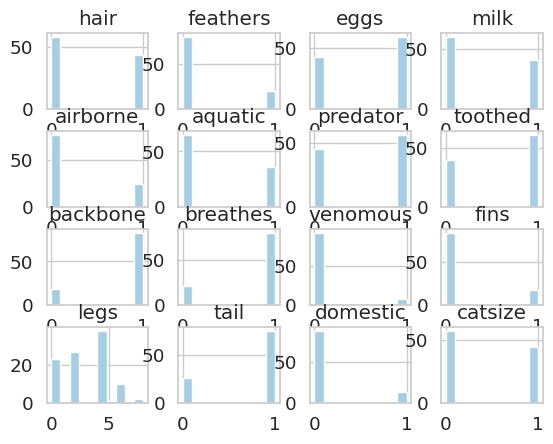

In [47]:
X.hist()